# Identifying Post-Starburst Regions for a Galaxy



Using the criteria we identified from the previous page and with our knowledge of the sdss-marvin api, 
let's now generate the actual code we use to detect PSBs.


A quick reminder of the criteria we are using:

- $H\alpha < 3$
- $Lick H\delta_{A} - \sigma(H\delta_{A}) > 4$


First, let's extract the two spectra that we are interested in. 
Let's use a sample galaxy with some known Post-Starburst regions!

In [1]:
import marvin
import matplotlib.pyplot as plt
from marvin.tools import Maps
import numpy as np
%matplotlib inline

[WARNING]: cannot initiate Sentry error reporting: [Errno 25] Inappropriate ioctl for device. (UserWarning)
[INFO]: No release version set. Setting default to DR17
[WARNING]: path /home/neap/sas/dr17/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Spectral index: HDeltaA'}, xlabel='spaxel', ylabel='spaxel'>)

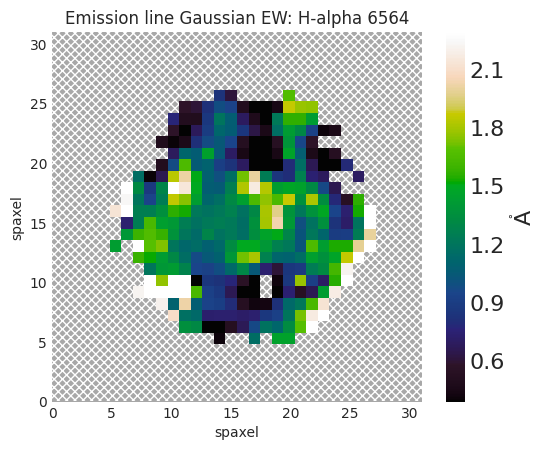

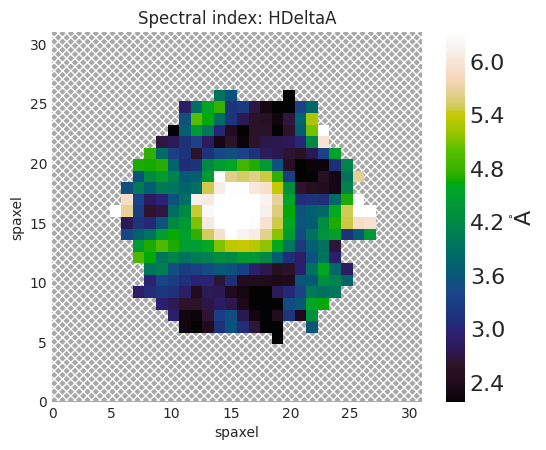

In [4]:
galaxy = marvin.tools.Maps('10507-1901', bintype='HYB10')
h_alpha_ew = galaxy.emline_gew_ha_6564
lick_h_delta = galaxy.specindex_hdeltaagalaxy
h_alpha_ew.plot()
lick_h_delta.plot()

A nice feature with this spectral data is that it contains not only the numerical values itself, but also a list of other attributes that SDSS has measured. You can learn about their additional features here.

Since we only want the values and the standard deviation of the spectra , we will use the getattr() function, and extract the 'value' and 'ivar' attributes. We must also note that the ivar value is the inverse variance of the data, which we convert to standard deviation through the following equation.

$1  /  {ivar^{2}}$ 

In [4]:
h_alpha_ew_values = getattr(h_alpha_ew, 'value', None)
h_delta_values= getattr(lick_h_delta, 'value', None)
h_delta_ivar_values = getattr(lick_h_delta, 'ivar', None)

Now, let's define a function to calculate whether a spaxel shows Post-Starburst behavior!
Since the data is stored in a 2D array, and represents the galaxy spatially through its spaxels, we can be assured that the spectra values for a location in any array will represent the same region across all spectras. As a result, instead of iterating through each individual spaxel, we can significantly speed up the iteration process through python masks. This allows us to compute the Post-Starburst criteria for all the values of the array at once! We return a 2D array the same size of the galaxy, which contains a True/False boolean at each location, indicating whether it is a Post-Starburst spaxel or not.

In [ ]:
def mask_PSB(hvalue, dvalue, divar): 

    psb = np.zeros(hvalue.shape, dtype=bool)
    var = 1 / np.sqrt(divar)
    psb[np.logical_and(hvalue < 3, (dvalue - var) > 4)] = True

    return psb

Before we are finished, let's add one last criteria! In order to make sure we only operate with reliable data, let's impose another cut for the Signal to Noise Ratio of our data. The Signal to Noise Ratio does exactly what its name suggests, and essentially tells us how reliable data for a certain spaxel is. We can retrieve the SNR values through the getattr() function again, and add it to our maskPSB function!

In [ ]:
snr = galaxy.spx_snr
snr_value = getattr(snr, 'value', None)

def mask_PSB(hvalue, dvalue, divar, snr): 
    psb = np.zeros(hvalue.shape, dtype=bool)

    var = 1 / np.sqrt(divar)
    psb[np.logical_and(np.logical_and(hvalue < 3, (dvalue - var) > 4), snr > 3)] = True

    return psb

Now that we have our function, let's test it on a sample galaxy!

First, let's produce an h-alpha plot of the galaxy. In order to inspect where the PSBs are located on the plot, let's overlay the mask on top of the h-alpha plot, and tell matplotlib to add a red-tint if the PSB at an index is true!

This produces the following:

![](book_images/psb.png)
 
 As we can see, we've successfully detected a central PSB region in this galaxy!